In [193]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [194]:
data = load_boston()

In [195]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [196]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [197]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [198]:
features_df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
features_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [199]:
df = pd.merge(features_df, pd.Series(data['target'], name='Price'), left_index=True, right_index=True)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


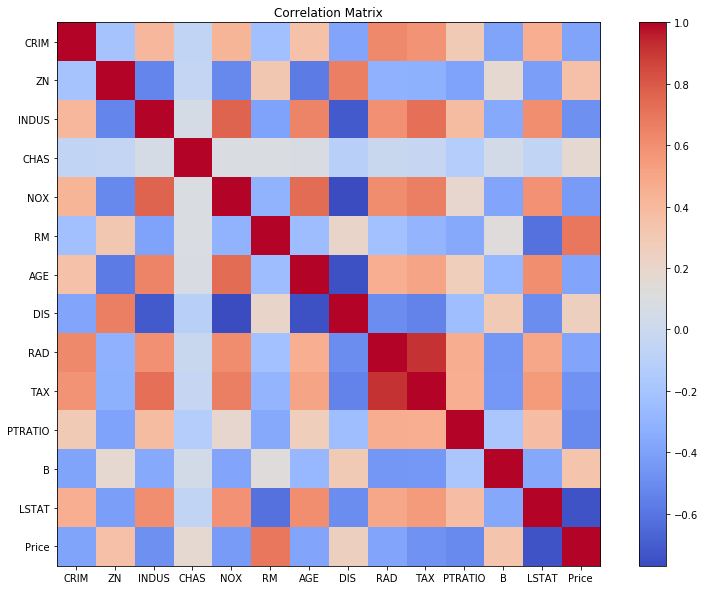

In [219]:
corrs = df.corr()
labels = corrs.columns.tolist()

fig, ax = plt.subplots(figsize=(14,10))

corr_matrix = ax.imshow(corrs, cmap='coolwarm')
plt.colorbar(corr_matrix)

ax.set(xticks=range(len(labels)), yticks=range(len(labels)), xticklabels=labels, yticklabels=labels)

plt.title('Correlation Matrix')
plt.show()

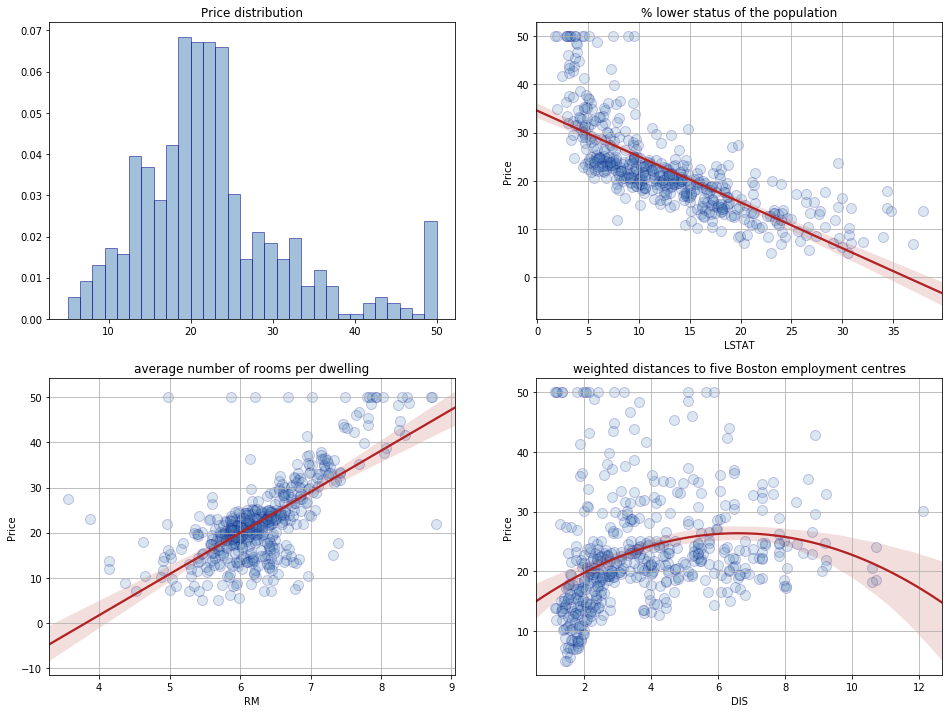

In [112]:
def subplot_regplot(feature, order):
    ax = sns.regplot(x=df[feature], y=df['Price'], order=order,
                     scatter_kws={'color':'steelblue', 'alpha':0.2, 'edgecolor':'darkblue', 's':100},
                     line_kws={'color':'firebrick'})
    return ax



titles = ['% lower status of the population',
          'average number of rooms per dwelling',
          'weighted distances to five Boston employment centres']
features = ['LSTAT', 'RM', 'DIS']
orders = [1,1,2]

fig = plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
plt.hist(df['Price'], density=True, bins=30, alpha=0.5, histtype='bar', color='steelblue', edgecolor='darkblue')
plt.title('Price distribution')

for i in range(3):
    plt.subplot(2,2,i+2)
    plt.title(titles[i])
    subplot_regplot(features[i], orders[i])
    plt.grid()

plt.show()


(446, 412)

In [180]:
df_map = df.groupby(['RM','DIS'])['Price'].mean().reset_index()
df_piv = pd.pivot(df_map, index='RM', columns='DIS', values='Price').fillna(0)
y = df_piv.index.values
x = df_piv.columns.values
z = df_piv.values

Text(0, 0.5, 'Average number of rooms per dwelling')

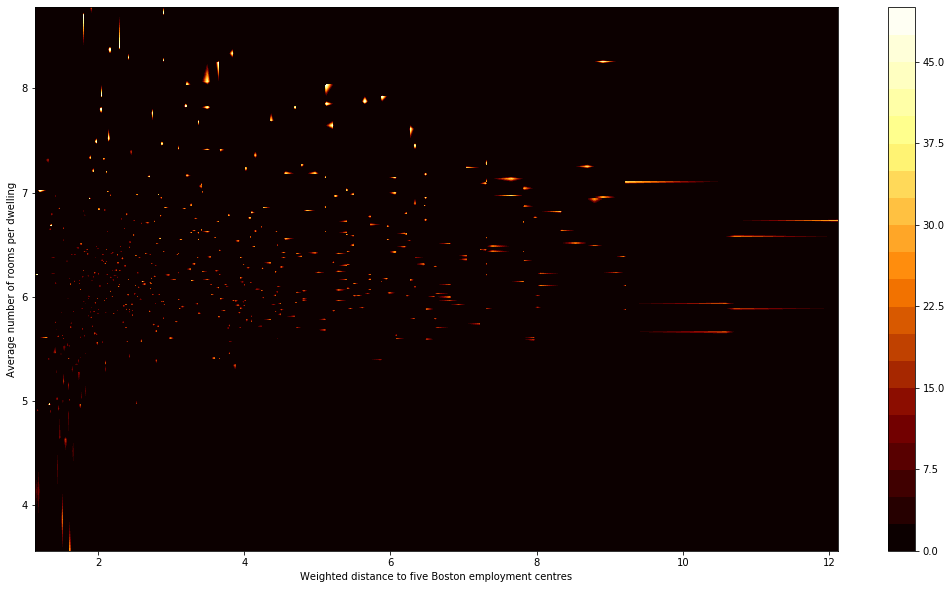

In [181]:
fig = plt.figure(figsize=(18,10))

plt.contourf(x, y, z, 20, cmap='afmhot')
plt.colorbar()
plt.xlabel('Weighted distance to five Boston employment centres')
plt.ylabel('Average number of rooms per dwelling')



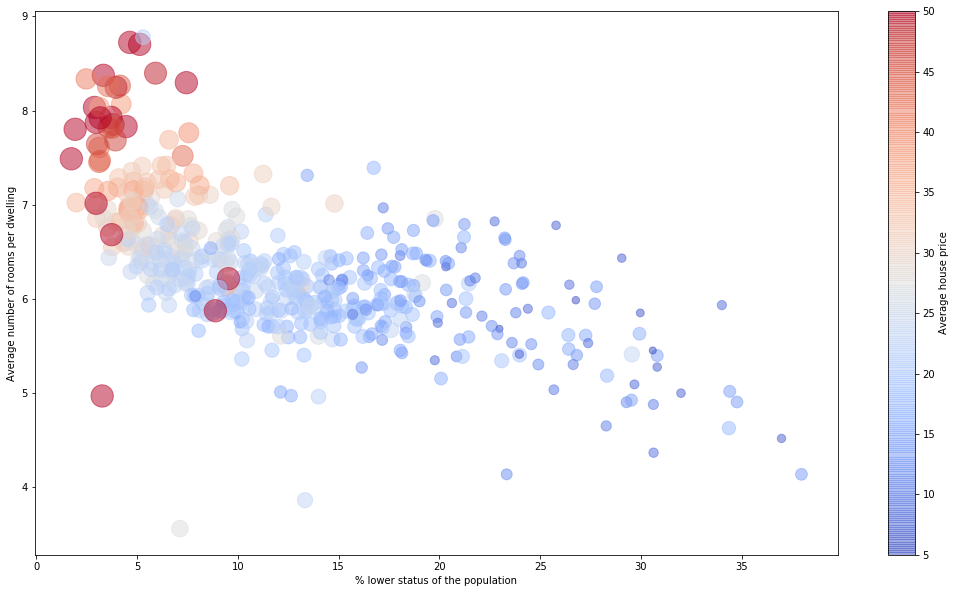

In [183]:
fig = plt.figure(figsize=(18,10))
plt.scatter(df.LSTAT, df.RM, c=df.Price, cmap='coolwarm', s=df.Price*10, linewidth=1, alpha=0.5)
plt.xlabel('% lower status of the population')
plt.ylabel('Average number of rooms per dwelling')
plt.colorbar(label='Average house price')